# 1
+ Prediction: Manual
+ Gradients Computation: Manual
+ Loss Computation: Manual
+ Parameter Updates: Manual

In [ ]:
import numpy as np

In [ ]:
# f = w * x

# f = 2 * x
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y_hat, y):
  return ((y_hat - y) ** 2).mean()

# gradient
# dl/dy_hat = 2(y_hat-y)/N, dy_hat/dw = x, dl/dw = 2x(y_hat-y)/N
def gradients(x, y_hat, y):
  return (2*x @ (y_hat - y)).mean()

print(f"prediction befor training: f(5) = {forward(5): .3f}")

learning_rate = 0.01
epochs = 15

for epoch in range(epochs):
  # prediction / forward pass
  y_hat = forward(x)

  # loss
  l = loss(y_hat, y)

  # gradients
  dw = gradients(x, y_hat, y)

  # update weights
  w -= learning_rate * dw

  if epoch % 2 == 0:
    print(f"epoch {epoch+1}: w = {w: .3f}, loss = {l: .8f}")

print(f"prediction after training: f(5) = {forward(5): .3f}")

prediction befor training: f(5) =  0.000
epoch 1: w =  1.200, loss =  30.00000000
epoch 3: w =  1.872, loss =  0.76800019
epoch 5: w =  1.980, loss =  0.01966083
epoch 7: w =  1.997, loss =  0.00050331
epoch 9: w =  1.999, loss =  0.00001288
epoch 11: w =  2.000, loss =  0.00000033
epoch 13: w =  2.000, loss =  0.00000001
epoch 15: w =  2.000, loss =  0.00000000
prediction after training: f(5) =  10.000


# 2
+ Prediction: Manual
+ Gradients Computation: Autograd
+ Loss Computation: Manual
+ Parameter Updates: Manual

In [ ]:
import torch

In [ ]:
# f = w * x

# f = 2 * x
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y_hat, y):
  return ((y_hat - y) ** 2).mean()

print(f"prediction befor training: f(5) = {forward(5): .3f}")

learning_rate = 0.01
epochs = 100

for epoch in range(epochs):
  # prediction / forward pass
  y_hat = forward(x)

  # loss
  l = loss(y_hat, y)

  # gradients
  l.backward()
  dw = w.grad

  # update weights
  with torch.no_grad():
    w -= learning_rate * dw

  w.grad.zero_()

  if epoch % 10 == 0:
    print(f"epoch {epoch+1}: w = {w: .3f}, loss = {l: .8f}")

print(f"prediction after training: f(5) = {forward(5): .3f}")

prediction befor training: f(5) =  0.000
epoch 1: w =  0.300, loss =  30.00000000
epoch 11: w =  1.665, loss =  1.16278565
epoch 21: w =  1.934, loss =  0.04506890
epoch 31: w =  1.987, loss =  0.00174685
epoch 41: w =  1.997, loss =  0.00006770
epoch 51: w =  1.999, loss =  0.00000262
epoch 61: w =  2.000, loss =  0.00000010
epoch 71: w =  2.000, loss =  0.00000000
epoch 81: w =  2.000, loss =  0.00000000
epoch 91: w =  2.000, loss =  0.00000000
prediction after training: f(5) =  10.000


# 3
+ Prediction: Manual
+ Gradients Computation: Autograd
+ Loss Computation: PyTorch Loss
+ Parameter Updates: PyTorch Optimizer

In [24]:
# 1) design model input, output size, forward pass
# 2) construct loss and optimizer
# 3) training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights

import torch
import torch.nn as nn
import torch.optim as optim

# f = w * x

# f = 2 * x
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

print(f"prediction befor training: f(5) = {forward(5): .3f}")

learning_rate = 0.1
epochs = 100

# loss = MSE
loss = nn.MSELoss()

optimizer = optim.SGD([w], lr=learning_rate)

for epoch in range(epochs):
  # prediction / forward pass
  y_hat = forward(x)

  # loss
  l = loss(y, y_hat)

  # gradients / backward pass
  l.backward()

  # update weights
  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f"epoch {epoch+1}: w = {w: .3f}, loss = {l: .8f}")

print(f"prediction after training: f(5) = {forward(5): .3f}")


prediction befor training: f(5) =  0.000
epoch 1: w =  3.000, loss =  30.00000000
epoch 11: w =  2.001, loss =  0.00002861
epoch 21: w =  2.000, loss =  0.00000000
epoch 31: w =  2.000, loss =  0.00000000
epoch 41: w =  2.000, loss =  0.00000000
epoch 51: w =  2.000, loss =  0.00000000
epoch 61: w =  2.000, loss =  0.00000000
epoch 71: w =  2.000, loss =  0.00000000
epoch 81: w =  2.000, loss =  0.00000000
epoch 91: w =  2.000, loss =  0.00000000
prediction after training: f(5) =  10.000


# 4
+ Prediction: PyTorch Model
+ Gradients Computation: Autograd
+ Loss Computation: PyTorch Loss
+ Parameter Updates: PyTorch Optimizer

In [4]:
# 1) design model input, output size, forward pass
# 2) construct loss and optimizer
# 3) training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights

import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# f = w * x

# f = 2 * x
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32, device=device)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32, device=device)

x_test = torch.tensor([5], dtype=torch.float32, device=device)

n_samoles, n_features = x.shape

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size, device=device)

print(f"prediction before training: f(5) = {model(x_test).item(): .3f}")

learning_rate = 0.1
epochs = 500

# loss = MSE
loss = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
  # prediction / forward pass
  y_hat = model(x)

  # loss
  l = loss(y, y_hat)

  # gradients / backward pass
  l.backward()

  # update weights
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 50 == 0:
    [w, b] = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item(): .3f}, loss = {l: .8f}")

print(f"prediction before training: f(5) = {model(x_test).item(): .3f}")


prediction before training: f(5) = -1.110
epoch 50: w =  1.983, loss =  0.00044106
epoch 100: w =  1.996, loss =  0.00002111
epoch 150: w =  1.999, loss =  0.00000101
epoch 200: w =  2.000, loss =  0.00000005
epoch 250: w =  2.000, loss =  0.00000000
epoch 300: w =  2.000, loss =  0.00000000
epoch 350: w =  2.000, loss =  0.00000000
epoch 400: w =  2.000, loss =  0.00000000
epoch 450: w =  2.000, loss =  0.00000000
epoch 500: w =  2.000, loss =  0.00000000
prediction before training: f(5) =  10.000


## Fully Automated Linear Regression

epoch 10: w = <built-in method item of Tensor object at 0x7dd2a2840d60> loss =  4415.63916016
epoch 20: w = <built-in method item of Tensor object at 0x7dd2a28e7790> loss =  3294.92260742
epoch 30: w = <built-in method item of Tensor object at 0x7dd2a2840ea0> loss =  2483.67407227
epoch 40: w = <built-in method item of Tensor object at 0x7dd2a2840ea0> loss =  1895.83154297
epoch 50: w = <built-in method item of Tensor object at 0x7dd2a2840d60> loss =  1469.46240234
epoch 60: w = <built-in method item of Tensor object at 0x7dd2a2840630> loss =  1159.93908691
epoch 70: w = <built-in method item of Tensor object at 0x7dd2a2840630> loss =  935.05657959
epoch 80: w = <built-in method item of Tensor object at 0x7dd2a2840ea0> loss =  771.54614258
epoch 90: w = <built-in method item of Tensor object at 0x7dd2a2840d60> loss =  652.57678223
epoch 100: w = <built-in method item of Tensor object at 0x7dd2a2840d60> loss =  565.96051025


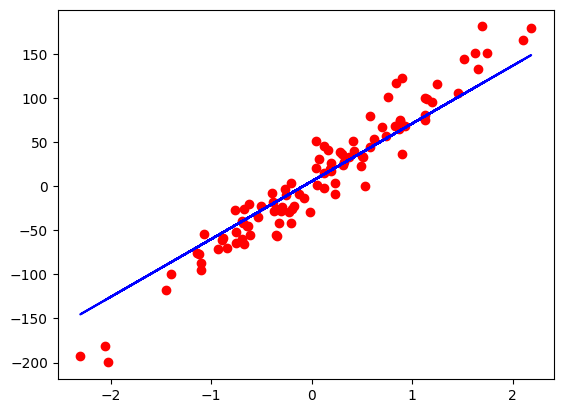

In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# prapare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# print(X)
# print(y)

y = y.view(y.shape[0], 1)
# print(y)

n_samples, n_features = X.shape
# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
epochs = 100
for epoch in range(epochs):
  #forward pass
  y_pred = model(X)

  # loss and backward pass / backpropagation
  l = loss(y_pred, y)
  l.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    [w, b] = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item} loss = {l: .8f}")

pred = model(X).detach()
plt.plot(X.numpy(), y.numpy(), 'ro')
plt.plot(X.numpy(), pred.numpy(), 'b')
plt.show()